In [16]:
#import dependencies
import pandas
import numpy
import hvplot.pandas
import matplotlib.pyplot as plt

#machine learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#connection to db
from connect_sql_db import build_engine

# Polynomial Regression Model

In [17]:
#look into polynomial linear regression


# Neural Network Classifier 

In [18]:
engine = build_engine(database_name="database1",host="35.225.193.21")

In [19]:
cleaned_df = pandas.read_sql("select * from cleaned_table",con=engine)

In [20]:
cleaned_df["stars"] = cleaned_df.stars.apply(lambda x: int(x))

In [21]:
X = cleaned_df.drop(cleaned_df.dtypes[cleaned_df.dtypes == "object"].index.tolist(), axis = 1)

In [22]:
y = cleaned_df.stars
X = X.drop("stars", axis=1).values

In [23]:
y.value_counts()

4    1972
3    1711
2     351
1      46
5      38
Name: stars, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 1
)

In [40]:
for i in X_test:
    print(i)

[  36.0197678 -115.2705904   76.           1.           0.
    0.           0.           1.           0.           0.
    0.           0.           0.           0.           0.
    0.           1.           0.           1.           1.
    0.           0.           1.           0.           0.
    1.           0.           0.           1.           0.
    0.           1.           0.           0.           0.
    0.           0.           0.           1.           0.
    0.           0.           0.           1.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           

    0.           0.       ]
[ 41.3985307 -82.2252628  92.          1.          0.          1.
   0.          1.          0.          0.          0.          0.
   0.          0.          1.          0.          1.          0.
   0.          1.          1.          0.          1.          0.
   0.          0.          0.          1.          1.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.       

    0.            0.        ]
[  33.63837327 -112.41343237   95.            1.            0.
    0.            0.            1.            0.            0.
    0.            0.            0.            0.            1.
    0.            1.            0.            0.            1.
    0.            0.            1.            0.            0.
    1.            0.            0.            1.            0.
    0.            1.            0.            0.            0.
    1.            0.            0.            0.            1.
    0.            0.            0.            1.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            1.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.     

    0.           0.       ]
[  33.434369 -111.925584  112.          0.          0.          1.
    0.          1.          1.          0.          0.          0.
    0.          0.          1.          0.          0.          1.
    0.          1.          0.          0.          1.          0.
    0.          1.          0.          0.          1.          0.
    0.          1.          0.          0.          0.          1.
    0.          0.          0.          1.          0.          0.
    0.          0.          1.          0.          0.          0.
    0.          0.          1.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.    

   0.         0.         0.         0.         0.         0.      ]
[  33.522359  -112.0645588  222.           1.           0.
    1.           0.           1.           1.           0.
    0.           0.           0.           0.           0.
    1.           1.           1.           1.           1.
    1.           1.           1.           0.           1.
    0.           0.           1.           1.           0.
    0.           1.           0.           0.           0.
    1.           0.           0.           0.           0.
    1.           0.           0.           0.           1.
    0.           0.           1.           0.           0.
    1.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           1.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.  

    0.            0.        ]
[ 3.61188410e+01 -1.15154483e+02  1.21700000e+03  1.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000

    0.           0.       ]
[  36.128052 -115.314556   79.          1.          0.          1.
    0.          1.          0.          0.          0.          0.
    0.          0.          1.          0.          0.          0.
    1.          1.          0.          0.          1.          0.
    1.          1.          0.          0.          1.          0.
    0.          0.          0.          1.          0.          1.
    0.          0.          0.          0.          1.          0.
    0.          1.          0.          0.          0.          0.
    0.          0.          1.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          1.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    0.          0.          0.          0.          0.          0.
    1.          0.          0.    

   0.          0.          0.          0.          0.          0.       ]
[  36.28587294 -115.1790418    88.            1.            0.
    1.            0.            1.            0.            0.
    0.            0.            0.            0.            1.
    0.            1.            1.            1.            1.
    0.            0.            1.            0.            0.
    1.            0.            0.            1.            0.
    0.            1.            0.            0.            0.
    1.            0.            0.            0.            1.
    0.            0.            0.            1.            0.
    0.            0.            0.            0.            0.
    1.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.          

In [25]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

enc = OneHotEncoder()
enc.fit(y_train.values.reshape(-1, 1))
encoded_y_train = enc.transform(y_train.values.reshape(-1, 1)).toarray()
encoded_y_test = enc.transform(y_train.values.reshape(-1, 1)).toarray()

In [26]:
model = Sequential()

In [27]:
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='relu'))

In [28]:
model.add(Dense(5, activation="softmax"))

In [29]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               19300     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
Total params: 24,915
Trainable params: 24,915
Non-trainable params: 0
_________________________________________________________________


In [31]:
fit_model = model.fit(
    X_train,
    encoded_y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
97/97 - 1s - loss: 1.9239 - accuracy: 0.4407
Epoch 2/100
97/97 - 0s - loss: 1.0162 - accuracy: 0.5347
Epoch 3/100
97/97 - 0s - loss: 0.9888 - accuracy: 0.5560
Epoch 4/100
97/97 - 0s - loss: 0.9857 - accuracy: 0.5677
Epoch 5/100
97/97 - 0s - loss: 0.9604 - accuracy: 0.5816
Epoch 6/100
97/97 - 0s - loss: 0.9355 - accuracy: 0.5962
Epoch 7/100
97/97 - 0s - loss: 0.9471 - accuracy: 0.6111
Epoch 8/100
97/97 - 0s - loss: 0.9342 - accuracy: 0.6017
Epoch 9/100
97/97 - 0s - loss: 0.9531 - accuracy: 0.5972
Epoch 10/100
97/97 - 0s - loss: 0.9633 - accuracy: 0.5962
Epoch 11/100
97/97 - 0s - loss: 0.9201 - accuracy: 0.6156
Epoch 12/100
97/97 - 0s - loss: 0.9393 - accuracy: 0.5891
Epoch 13/100
97/97 - 0s - loss: 0.8910 - accuracy: 0.6195
Epoch 14/100
97/97 - 0s - loss: 0.8996 - accuracy: 0.6111
Epoch 15/100
97/97 - 0s - loss: 0.9191 - accuracy: 0.6114
Epoch 16/100
97/97 - 0s - loss: 0.8756 - accuracy: 0.6153
Epoch 17/100
97/97 - 0s - loss: 0.8725 - accuracy: 0.6250
Epoch 18/100
97/97 - 0s

In [32]:
# Make predictions
predicted = model.predict(X_test_scaled)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pandas.DataFrame({
    "Actual": y_test,
    "Predicted": predicted
})
results.head(10)

,Actual,Predicted
2051,4,4
1520,2,1
823,3,2
3634,4,4
2932,4,2
2435,2,3
1953,3,2
200,4,2
1915,4,4
2538,3,3


In [33]:
print(classification_report(results.Actual, results.Predicted))

              precision    recall  f1-score   support

           1       0.04      0.90      0.07        10
           2       0.12      0.51      0.19        96
           3       0.41      0.08      0.13       426
           4       0.68      0.32      0.44       490
           5       0.02      0.12      0.04         8

    accuracy                           0.24      1030
   macro avg       0.25      0.39      0.17      1030
weighted avg       0.51      0.24      0.28      1030



<AxesSubplot:>

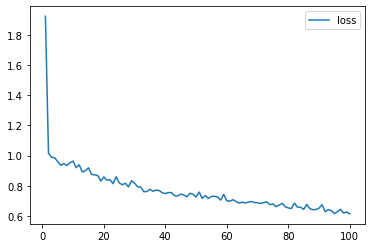

In [34]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["loss"]) + 1)
)

result_df.plot(y="loss")

<AxesSubplot:>

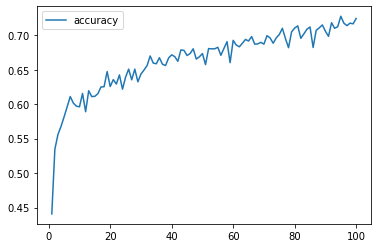

In [35]:
#testing
result_df = pandas.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["accuracy"]) + 1)
)

result_df.plot(y="accuracy")

In [36]:
print(X_test_scaled)

[[-0.01543156 -0.8025167  -0.52612615 ...  0.         -0.01799831
  -0.17621508]
 [ 1.82389138  1.46368091 -0.6219554  ...  0.         -0.01799831
  -0.17621508]
 [-0.81388047 -0.59815043  0.00668446 ...  0.         -0.01799831
  -0.17621508]
 ...
 [-0.89404665 -0.58592346 -0.13514282 ...  0.         -0.01799831
  -0.17621508]
 [-0.8834862  -0.58061645 -0.2654706  ...  0.         -0.01799831
  -0.17621508]
 [-0.36521739  1.52943359 -0.61812223 ...  0.         -0.01799831
  -0.17621508]]


In [ ]:
#r2